<a href="https://colab.research.google.com/github/bingsen-wang/EE-Fundamentals/blob/main/Phase_concept.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Phasors
</h1></b>

Dr. Bingsen Wang

12/15/2023
</center>

#Python Code
The Python code illustrates the Phasor concept.

0
0
1
2
3
0


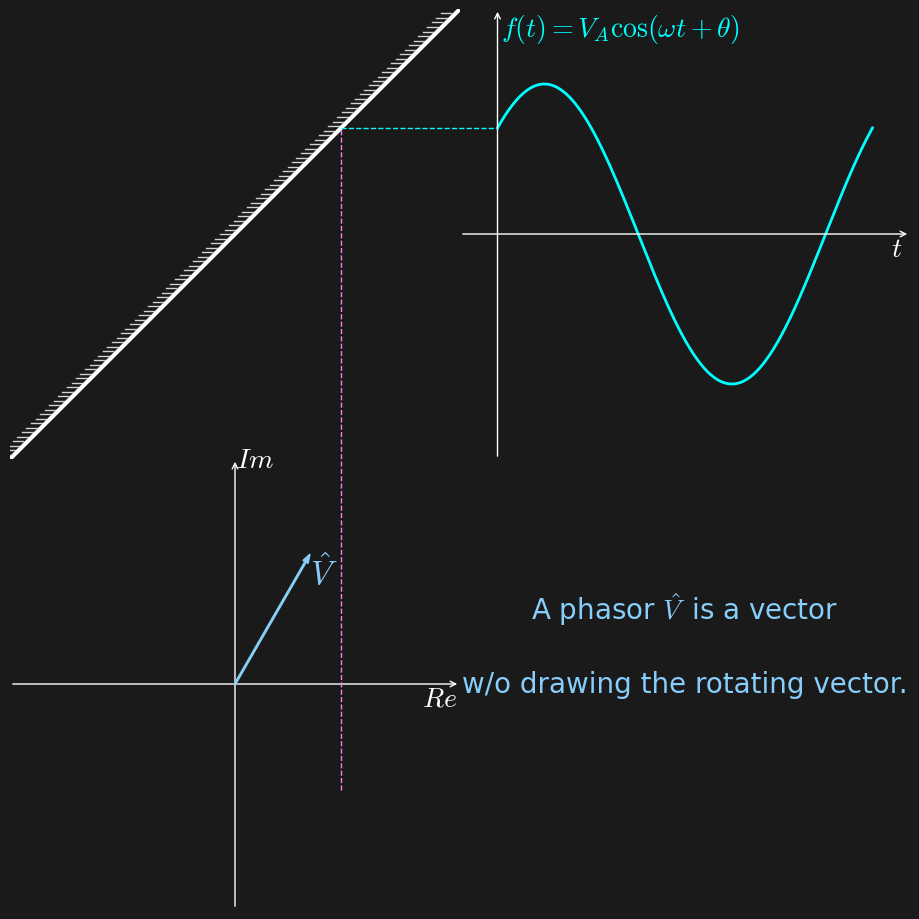

In [50]:
import matplotlib
from os import linesep
from numpy import linspace,cos,pi,sin,random,exp,real, imag,heaviside,fft,array
import matplotlib.pyplot as plt
from scipy.integrate import quad
from matplotlib import animation,rc
rc('animation', html='jshtml')
plt.rcParams.update({"font.family" : "sans serif","mathtext.fontset" : "cm"})

# draw dotted line between three points in three different plots
def l2Ax(fig,ax1,ax2,ax3,p1,p2,p3,colors):
  transFigure = fig.transFigure.inverted()
  p1_g = transFigure.transform(ax1.transData.transform(p1))
  p2_g = transFigure.transform(ax2.transData.transform(p2))
  p3_g = transFigure.transform(ax3.transData.transform(p3))
  line1 = matplotlib.lines.Line2D((p1_g[0],p2_g[0]),(p1_g[1],p2_g[1]),
                      transform=fig.transFigure,ls='--',color=colors[1], lw=1)
  line2 = matplotlib.lines.Line2D((p2_g[0],p3_g[0]),(p2_g[1],p3_g[1]),
                      transform=fig.transFigure,ls='--',color=colors[2], lw=1)
  fig.lines= [line1,line2]
  return

def fixedVectorDraw(ax,vec,txt,colors): #draw fixed phasor
  ax.clear()
  ax.set_xlim(-1.5,1.5)
  ax.set_ylim(-1.5,1.5)
  ax.axis('off')
  ax.arrow(0,0,vec.real,vec.imag,
             width = 0.01,head_width=0.04,length_includes_head=True,color=colors[0])
  ax.text(vec.real,vec.imag,txt,va = 'top',ha='left',size=24,color=colors[0])
  return

def dynamicVectorDraw(ax,vec,t,txt,colors): #draw rotating phasor
  ax.clear()
  ax.set_xlim(-1.5,1.5)
  ax.set_ylim(-1.5,1.5)
  ax.axis('off')
  ax.arrow(0,0,vec.real,vec.imag,
             width = 0.01,head_width=0.04,length_includes_head=True,color=colors[0])
  ax.text(vec.real,vec.imag,txt[0],va = 'top',ha='left',size=24,color=colors[0])
  vec_traj = vec*exp(1j*2*pi*t)#trajectory of the vector rotation
  vec_r = vec_traj[-1] #rotating vector
  ax.arrow(0,0,vec_r.real,vec_r.imag,width = 0.01,head_width=0.04,
           length_includes_head=True,color=colors[0],alpha=0.5)
  ax.text(vec_r.real,vec_r.imag,txt[1],va = 'top',ha='left',size=20,color=colors[1])
  ax.plot(vec_traj.real,vec_traj.imag,color=colors[1],lw=3)
  return
#parameters
clst=['lightskyblue','violet','aqua','cornflowerblue','yellow','w',(.1,.1,.1)] #colors dark bg
# clst=['mediumblue','m','brown','navy','brown',(.1,.1,.1),'w'] #colors light bg
Nf = 512
t=linspace(0,1,Nf)
Vph = exp(1j*pi/3)#phasor
Vphs = [0.5*exp(1j*pi/3),1.2*exp(1j*2*pi/3),0.8*exp(1j*7*pi/6),exp(-1j*pi/4)]
vec_traj = Vph*exp(1j*2*pi*t)
fig = plt.figure(figsize=(9,9),facecolor=clst[-1])
fig.tight_layout()
ax_frame = [[[0, 0, .5, .5], [-1.5,1.5], [-1.5,1.5]], #complex plane
            [[0, 0, .5, .5], [-1.5,1.5], [-1.5,1.5]], #animated vectors
            [[.5, .5, .5, .5], [-.1,1.1], [-1.5,1.5]], #square wave in time
            [[0, .5, .5, .5], [-1.5,1.5], [-1.5,1.5]], #mirror
            [[.5, 0, .5, .5], [-1.5,1.5], [-1.5,1.5]], #text area
            ]# [pos-boundary, xlim, ylim] for subplots
ax_lbl=[['$Im$', '$Re$'],
        ['', ''],
        ['', '$t$'], # time domain plot
        ['', ''],
        ['', ''],
        ] #variables for yx axes of each subplot

ax_lst=[] #axis list or the list of subplots
ytxt_lst=[] #list of y texts
line_lst = [] #array containing all the line segments
for k in range(len(ax_frame)):
  xn,xm,yn,ym = ax_frame[k][1]+ax_frame[k][2]
  ax=fig.add_axes(ax_frame[k][0],xlim=[xn,xm], ylim=[yn,ym],fc='none') #no fc
  ax.axis('off') #turn off axis frames
  ax_lst.append(ax)
  if k==3:
    ax.plot([-1.5,1.5], [-1.5,1.5], color=clst[-2], lw=3)
    for i in range(100):
      ax.plot([-1.6+i*3/100, -1.53+i*3/100],[-1.5+i*3/100,-1.5+i*3/100], color='lightgray', lw=1)
  elif k==0 or k==2:
    ax.annotate("", (xm, 0), (xn, 0),arrowprops={'arrowstyle':"->",'color':clst[-2]}) #x-axis
    ax.annotate("", (0,ym), (0,yn),arrowprops={'arrowstyle':"->",'color':clst[-2]}) #y-axis
  line_lst.append(ax.plot([], [],color=clst[k], lw=2)[0])
  ax.text(xm-.02,0,ax_lbl[k][-1],size=20,va='top',ha='right',color=clst[-2]) #x-axis label
  if k==0:
    ytxt_lst.append(ax.text(0.01,ym,ax_lbl[k][0],color=clst[-2],size=20,va='center')) #y label
  else:
    ytxt_lst.append(ax.text(0.01,ym-0.02,ax_lbl[k][0],color=clst[k],size=20,va='top')) #y label
# ax_lst[0].plot(traj.real,traj.imag,color=clst[0],marker='o',markersize=6, lw=1)
tx1 = ax_lst[4].text(0,0.5,'',size=20,va='center',ha='center',color=clst[0]) #text in quad iv
tx2 = ax_lst[4].text(0,0,'',size=20,va='center',ha='center',color=clst[0]) #text in quad iv
# animation function. This is called sequentially
def animate(i):
  k=int(i/Nf)
  ii = i%Nf
  if ii==0:
    print(k)
  if k==0 and ii==0:
    tx1.set_text('A phasor $\hat V$ is a vector')
    fixedVectorDraw(ax_lst[1],Vph,'$\hat V$',clst)
  elif k==0 and ii == int(Nf*0.5):
    tx2.set_text('denoted by a complex number.')
    fixedVectorDraw(ax_lst[1],Vph,r'$\hat V =V_A e^{j\theta}$',clst)
  elif k==1:
    tx1.set_text('Starting from $\hat V$,')
    tx2.set_text(r'$\hat V e^{j\omega t}$ rotates at $\omega$.')
    dynamicVectorDraw(ax_lst[1],Vph,t[:ii+1],
     [r'$\hat V =V_A e^{j\theta}$',r'$\hat Ve^{j\omega t}$'],clst)
  elif k==2:
    tx1.set_text(r'Real part of $\hat Ve^{j\omega t}$')
    tx2.set_text(r'$V_A\cos(\omega t + \theta)$ becomes the $f(t)$.')
    ytxt_lst[2].set_text(r'$f(t)=V_A\cos(\omega t + \theta)$')
    dynamicVectorDraw(ax_lst[1],Vph,t[:ii+1],
     [r'$\hat V =V_a e^{j\theta}$',r'$\hat Ve^{j\omega t}$'],clst)
    p1 = [vec_traj[ii].real,min(0,vec_traj[ii].imag)]
    p2 = [vec_traj[ii].real,vec_traj[ii].real]
    p3 = [t[ii],vec_traj[ii].real]
    l2Ax(fig,ax_lst[0],ax_lst[3],ax_lst[2],p1,p2,p3,clst)
    line_lst[2].set_data(t[:ii+1],vec_traj[:ii+1].real)
  elif k==3:
    tx1.set_text(r'Each $\hat V$ corresponds to an $f(t)$' )
    tx2.set_text(r'w/o drawing the rotating vector.')
    kk = int(ii/(Nf/len(Vphs)))
    fixedVectorDraw(ax_lst[1],Vphs[kk],'$\hat V$',clst)
    p1 = [Vphs[kk].real,min(0,Vphs[kk].imag)]
    p2 = [Vphs[kk].real,Vphs[kk].real]
    p3 = [0,Vphs[kk].real]
    l2Ax(fig,ax_lst[0],ax_lst[3],ax_lst[2],p1,p2,p3,clst)
    line_lst[2].set_data(t,(Vphs[kk]*exp(1j*2*pi*t)).real)
  return

anim = animation.FuncAnimation(fig, animate, frames=Nf*4, interval=200)
anim #uncomment to generate animation in the output area
# to save the animation, uncomment the following three lines
fn = "Phasor_concept.mp4"
writervideo = animation.FFMpegWriter(fps=100)
anim.save(fn, writer=writervideo,dpi = 120)

#debug
# print(len(trajrec[0]))